In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings(action='ignore')
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.formula.api as formula
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels as sm
from sklearn import preprocessing
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LinearRegression,Lasso,Ridge
#from sklearn.externals import joblib
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from IPython.display import display
from sklearn import metrics

In [2]:
data = pd.read_excel (r'D:\Downloads\rk_month.xlsx')
data['From Date']=pd.to_datetime(data['From Date'])
data['year'] = data['From Date'].dt.year
data['month'] = data['From Date'].dt.month
data['day'] = data['From Date'].dt.day

In [3]:
import datetime as dt

In [4]:
data['From Date']= data['From Date'].map(dt.datetime.toordinal)

In [5]:
df=data.loc['0':'365']

In [6]:
X1 = df[['From Date','year', 'month', 'day']]
Y1 = df['NH3']

In [22]:
xtrain,xtest,ytrain,ytest = train_test_split(X1,Y1,test_size=.2,random_state=7)

In [23]:
grad_boost = GradientBoostingRegressor(n_estimators=1000,
                                      max_depth=8,
                                      max_features='auto',
                                      min_samples_split=5,
                                      min_samples_leaf=4,
                                      learning_rate=0.01)

grad_boost.fit(xtrain,ytrain)

GradientBoostingRegressor(learning_rate=0.01, max_depth=8, max_features='auto',
                          min_samples_leaf=4, min_samples_split=5,
                          n_estimators=1000)

In [24]:
# we now score the model
print('Score on train data: {}\n'.format(grad_boost.score(xtrain,ytrain)))
print('Score on test data: {}\n'.format(grad_boost.score(xtest,ytest)))

gboost_pred = grad_boost.predict(xtest)
gboost_mse = mean_squared_error(ytest,gboost_pred)
gboost_accuracy = r2_score(ytest,gboost_pred)

print('Root Mean Squared Error: {}\n'.format(np.sqrt(gboost_mse)))
print('Overall model accuracy: {}'.format(gboost_accuracy))

Score on train data: 0.9857956231502352

Score on test data: 0.7937460500624048

Root Mean Squared Error: 8.037076767848328

Overall model accuracy: 0.7937460500624048


In [25]:
test=data.loc['366':'418']
X=test[['From Date','year', 'month', 'day']]
X

,From Date,year,month,day
366,737436,2020,1,12
367,737443,2020,1,19
368,737450,2020,1,26
369,737457,2020,2,2
370,737464,2020,2,9
371,737471,2020,2,16
372,737478,2020,2,23
373,737485,2020,3,1
374,737492,2020,3,8
375,737499,2020,3,15


In [26]:
predict=grad_boost.predict(X)

In [27]:
predict

array([27.06862735, 26.97883781, 22.66216643, 25.1687357 , 24.59488861,
       25.0235307 , 22.1657025 , 24.79481168, 26.33531679, 24.55426372,
       23.51264724, 20.15134674, 24.61030249, 25.39694426, 24.68391459,
       21.8228935 , 24.36295582, 26.75010826, 25.820948  , 20.16963555,
       17.42510844, 25.50086289, 24.81057203, 24.7382512 , 21.95447228,
       24.36529121, 23.79737854, 23.25267402, 19.79683147, 22.23460423,
       21.9024495 , 20.88688626, 15.46431662, 14.88625464, 20.66076176,
       22.17973396, 21.31905188, 15.55885632, 24.37812235, 24.52616742,
       24.20366662, 17.4519057 , 23.1427288 , 24.4689006 , 24.47358806,
       22.56188319, 17.77850217, 27.19279466, 28.2646483 , 24.69553714,
       24.59395166, 26.49166849])

In [28]:
X['From Date']= X['From Date'].map(dt.datetime.fromordinal)

In [29]:
test['From Date']= test['From Date'].map(dt.datetime.fromordinal)

In [30]:
test = test.set_index(['From Date'])
X = X.set_index(['From Date'])


In [31]:
X['pred']=predict

<AxesSubplot:xlabel='From Date'>

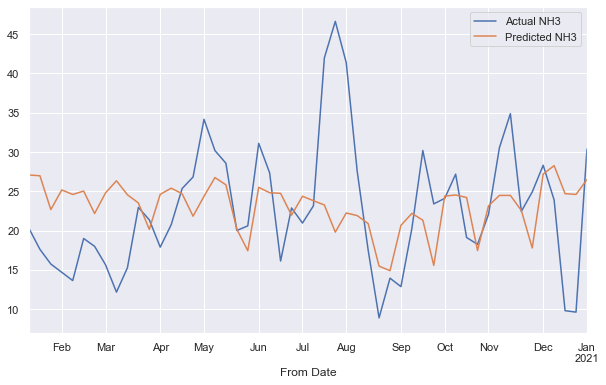

In [32]:
test['NH3'].plot(legend=True, label='Actual NH3', figsize=(10,6))
X['pred'].plot(legend=True, label='Predicted NH3')

In [33]:
np.sqrt(mean_squared_error(test['NH3'],X['pred']))

8.350355757670844

In [34]:
mae = metrics.mean_absolute_error(ytest, gboost_pred)
mse = metrics.mean_squared_error(ytest, gboost_pred)
rmsetest = np.sqrt(mse) # or mse**(0.5)  
r2 = metrics.r2_score(ytest,gboost_pred)

print("Results of sklearn.metrics:")
print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmsetest)
print("R-Squared:", r2)

Results of sklearn.metrics:
MAE: 5.661498163447176
MSE: 64.59460297228732
RMSE: 8.037076767848328
R-Squared: 0.7937460500624048


In [35]:
mae = metrics.mean_absolute_error(test['NH3'],X['pred'])
mse = metrics.mean_squared_error(test['NH3'],X['pred'])
rmse = np.sqrt(mse) # or mse**(0.5)  
r2 = metrics.r2_score(test['NH3'],X['pred'])

print("Results of sklearn.metrics:")
print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-Squared:", r2)

Results of sklearn.metrics:
MAE: 6.3061126975861255
MSE: 69.72844127966661
RMSE: 8.350355757670844
R-Squared: -0.07386255710358225


In [36]:
import pickle
filename = 'Ozone_gboostmodel.sav'
pickle.dump(grad_boost, open(filename, 'wb'))

In [37]:
#load model
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(xtest, ytest)
print(result)

0.7937460500624048


# 3rd plot

In [38]:
testcase = pd.DataFrame()

In [39]:
testcase['test']=ytest
testcase['pred']=gboost_pred

In [40]:
testcase["Corrected"] = np.where(testcase["pred"]<testcase["test"],testcase["pred"]+rmsetest ,
                   np.where(testcase["pred"]>testcase["test"], testcase["pred"]-rmsetest,
                            testcase["pred"]))

In [41]:
testcase

,test,pred,Corrected
228,12.684286,14.647108,6.610031
88,27.890000,26.862956,34.900033
206,48.005714,39.929884,47.966961
235,49.227143,41.880378,49.917455
357,13.642857,24.303626,16.266549
...,...,...,...
15,45.032857,41.188902,49.225979
295,10.180000,12.500284,4.463207
246,20.857143,11.755065,19.792142
89,32.341429,30.918430,38.955507


In [42]:
'''testcase['test'].plot(legend=True, label='Actual PM2.5', figsize=(10,6))
testcase['pred'].plot(legend=True, label='Predicted PM2.5')
testcase["Corrected"].plot(legend=True, label='Corrected PM2.5')'''

'testcase[\'test\'].plot(legend=True, label=\'Actual PM2.5\', figsize=(10,6))\ntestcase[\'pred\'].plot(legend=True, label=\'Predicted PM2.5\')\ntestcase["Corrected"].plot(legend=True, label=\'Corrected PM2.5\')'

In [43]:
r2 = metrics.r2_score(testcase["Corrected"],testcase['test'])
r2

0.8625229535292507

In [44]:
test2020=pd.DataFrame()

In [45]:
test2020['test']=test['NH3']
test2020['pred']=X['pred']

In [46]:
test2020.index=test.index

In [47]:
test2020["Corrected"] = np.where(test2020["pred"]<test2020["test"],test2020["pred"]+rmsetest ,
                   np.where(test2020["pred"]>test2020["test"], test2020["pred"]-rmsetest,
                            test2020["pred"]))

<AxesSubplot:xlabel='From Date'>

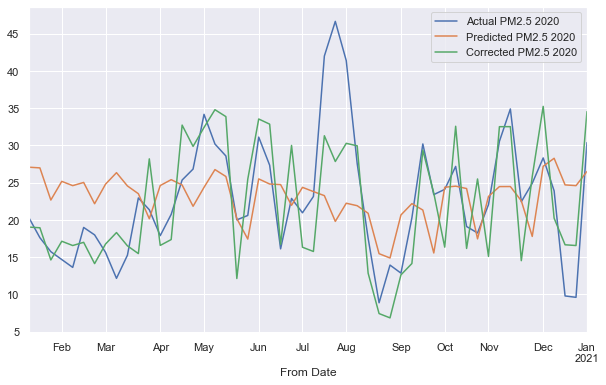

In [48]:
test2020['test'].plot(legend=True, label='Actual PM2.5 2020', figsize=(10,6))
test2020['pred'].plot(legend=True, label='Predicted PM2.5 2020')
test2020["Corrected"].plot(legend=True, label='Corrected PM2.5 2020')

In [49]:
r2020 = metrics.r2_score(test2020["Corrected"],test2020['test'])
r2020

0.5006767268118391